In [32]:
#All the imports we need for this project
import requests                                                  
import json
from pprint import pp
import wordcloud
from matplotlib import pyplot as plt
from IPython.display import display

HackerNews/API "https://hacker-news.firebaseio.com/v0/topstories.json" provides top 500 top and new stories. This api endpoint returns Items IDS of top 500 new stories. User the get request to get all the Item IDS

In [17]:
baseurl="https://hacker-news.firebaseio.com/v0/topstories.json"   #hacker news top stories url
response=requests.get(baseurl)                                    #get the top 500 stories list
top_stories_ids=response.json()                                       #top 500 stories item ID
pp(top_stories)

[34379109,
 34378756,
 34379483,
 34380220,
 34379787,
 34379156,
 34376276,
 34379892,
 34379984,
 34377826,
 34349278,
 34379577,
 34346727,
 34378460,
 34380388,
 34376420,
 34377461,
 34367035,
 34376775,
 34366767,
 34362157,
 34379699,
 34377227,
 34364991,
 34379965,
 34374710,
 34370440,
 34366610,
 34374725,
 34375921,
 34369562,
 34364806,
 34375325,
 34378254,
 34373279,
 34377910,
 34364748,
 34363918,
 34377619,
 34373928,
 34371073,
 34364807,
 34352133,
 34367767,
 34374083,
 34347193,
 34360010,
 34368597,
 34369560,
 34375137,
 34377853,
 34365515,
 34379581,
 34349484,
 34372765,
 34375551,
 34354213,
 34361651,
 34375735,
 34379792,
 34351887,
 34347079,
 34368601,
 34349558,
 34367390,
 34351258,
 34372587,
 34378011,
 34367780,
 34371123,
 34367820,
 34365110,
 34358795,
 34363991,
 34372140,
 34374840,
 34359656,
 34367747,
 34365609,
 34378767,
 34373725,
 34370192,
 34350260,
 34379758,
 34374847,
 34365048,
 34366657,
 34359504,
 34351304,
 34366286,
 34363916,

Using 500 top stories Item IDs get information about individual stories using 
URL-"https://hacker-news.firebaseio.com/v0/item/<itemid>.json"

In [69]:
def get_item(itemid):                                                          #function to data related to perticular Item ID
    url="https://hacker-news.firebaseio.com/v0/item/"
    try:
        res=requests.get(url+str(itemid)+".json")
        item_result=res.json()                                                 #store the json result of response (res)
        return item_result
    except requests.ConnectionError as e:
        return e
# pp(get_item(34347778))
pp(get_item(34347778))

{'by': 'frxx',
 'descendants': 657,
 'id': 34347778,
 'kids': [34351759,
          34348197,
          34348021,
          34381724,
          34348135,
          34353082,
          34347937,
          34353122,
          34351954,
          34350657,
          34348635,
          34348260,
          34351516,
          34349688,
          34349518,
          34351808,
          34352500,
          34351224,
          34350953,
          34349263,
          34350790,
          34348078,
          34348026,
          34349165,
          34351122,
          34349791,
          34348412,
          34350164,
          34347965,
          34348786,
          34348027,
          34349806,
          34350097,
          34349026,
          34348287,
          34351751,
          34348178,
          34352209,
          34348163,
          34348497,
          34348159,
          34349701,
          34348016,
          34348024,
          34348116,
          34353251],
 'score': 292,
 'time': 16

Collect data for all the Ids return in top_stories_ids list

In [5]:
def get_top_stories():                        #function to get information of top stories
    url="https://hacker-news.firebaseio.com/v0/item/"
    item_list=[]
    try:
        for item in top_stories_ids:                              #for loop to get data about all the IDs from our top_stories_id list
            res=requests.get(url+str(item)+".json")               
            item_list.append(res.json())                          #store data in item_list
        return item_list                                          #return all data item_list
    except requests.ConnectionError as e:
        return e

stories_info=get_top_stories()
pp(stories_info[3])


{'by': 'pseudolus',
 'descendants': 8,
 'id': 34379787,
 'kids': [34380905, 34380700, 34380491, 34380733],
 'score': 28,
 'time': 1673699578,
 'title': 'The Special Armored Money Train That Ran from 1951 to 2006 in NYC',
 'type': 'story',
 'url': 'https://untappedcities.com/2023/01/05/mta-armored-money-train-nyc/'}


Lets find most commented story id

In [68]:
def most_comments_story():    #function to get Item ID of story which has received maximum comments
    comments= {}              #dict to collect data about story Id and number of comments corresponding to that id.
    for item in stories_info:
        if 'descendants' in item.keys():
            comments[item['id']] = item['descendants']
    sorted_count=sorted(comments.items(),key= lambda x:x[1],reverse=True)      #sort the colllect data dict according to number of comments
    return sorted_count[0],sorted_count[-1]

most_comments_item,least_comments_item=most_comments_story()
print(f'Most comments :- {most_comments_item} \nleast comments :- {least_comments_item}')

Most comments :- (34347778, 656) 
least comments :- (34357966, 0)


Lets get all the comments for the most commented story.

In [77]:
comments_data=[]                                                   #list to store all the comments

def get_comment(item):                                             #function to get comment data
    url="https://hacker-news.firebaseio.com/v0/item/"
    response=requests.get(url+str(item)+".json")
    data1=response.json()
    comments=[]
    if 'text' in data1.keys():
        comments.append(data1['text'])
    # print(comments)
        comments_data.append(data1['text'])
    
    if "kids" in data1.keys() and len(data1["kids"]) > 0:
        for kid in data1["kids"]:
            get_comment(kid)                                         #Recurcive function call to get all sub comments data
            # print(comments)
            # comments.append(data["text"])
    
    
def get_comments_for(item):                                          #functon to get comments data for perticular id. in project item which received max comments
    comments_data=[] 
    url="https://hacker-news.firebaseio.com/v0/item/"
    response=requests.get(url+str(item)+".json")
    data=response.json()
    count=1
    comment=[]
    if "kids" in data.keys() and len(data["kids"]) > 0:
        for kid in data["kids"]:                                   #for loop for parent comment
            get_comment(kid)
12870001 
# get_comments_for(12870001) 
most_comments_item_ID = most_comments_item[0]    
get_comments_for(most_comments_item_ID)



Lets write a that iterates through the words comments_data, removes punctuation, and counts the frequency of each word. and we have to make sure it ignore word case, words that do not contain all alphabets and boring words like "and" or "the". Then use it in the generate_from_frequencies function to generate our very own word cloud!

In [78]:
def calculate_frequencies(comments_data):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just","in","then","for","not",\
    "on","like","there","would"]
    
     
    required_directory={}                              #dict to store word frequency
    dictonary_list=[]
    for comment in comments_data:
        for word in str(comment).split():
            # print(word)
            if word.isalpha() and word.lower() not in uninteresting_words:        #ingnore word case, words that do not contains alphabets, and boring words
                dictonary_list.append(word.lower())
    
    for word in dictonary_list:
        if word not in required_directory:
            required_directory[word]=1
        required_directory[word]+=1
    
    # print(required_directory)
    wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(required_directory)                     #cloud method that takes dict of words and their frequencies and creates cloud from count
    return cloud.to_array()
# print(calculate_frequencies(comments_data))

Most commented news in top stories : : 
New video of Tesla crash demonstrates the problem of semi-automated driving  
Link : - https://www.theautopian.com/newly-released-video-of-thanksgiving-day-tesla-full-self-driving-crash-demonstrates-the-fundamental-problem-of-semi-automated-driving-systems/


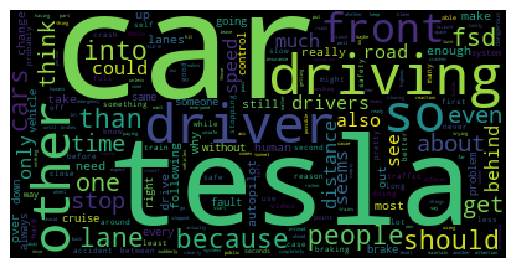

In [79]:
myimage = calculate_frequencies(comments_data)
plt.imshow(myimage, interpolation = 'nearest')                      
plt.axis('off')                               #hide turn off axis
news=get_item(most_comments_item_ID)
print(f"Most commented news in top stories : : \n{news['title']}  \nLink : - {news['url']}")
plt.show()                                      #show the word cloud